<a href="https://colab.research.google.com/github/nasare34/Diabetic-Retinopathy-detection-using-Imbalanced-Datasets-ResNet18/blob/main/Resnet18_Diabetic_retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If I  don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining the path to the training data directly in Google Drive
train_data_dir = '/content/drive/My Drive/train'

# Listing the contents of the 'train' directory and exclude '.DS_Store'
contents = [f for f in os.listdir(train_data_dir) if f != '.DS_Store']
print(contents)

['Moderate', 'Proliferate_DR', 'Severe', 'Mild', 'No_DR']


In [ ]:
os.listdir(os.path.join('train', 'Mild'))

In [ ]:
# Defining the path to the 'Mild' directory within 'train'
mild_data_dir = '/content/drive/My Drive/train/Mild'

# Listing the contents of the 'Mild' directory
mild_contents = os.listdir(mild_data_dir)
print(mild_contents)

['107aea0d9289.png', '1df3e03a8f5f.png', '0dce95217626.png', '04ac765f91a1.png', '10f36b0239fb.png', '194814669fee.png', '0684311afdfc.png', '1bb0ddfe753a.png', '15cc2aef772a.png', '1116271db4ea.png', '07a1c7073982.png', '0a3202889f4d.png', '0024cdab0c1e.png', '03e25101e8e8.png', '1e8a1fdee5b9.png', '18b06f56ab27.png', '0369f3efe69b.png', '172df1330a60.png', '07929d32b5b3.png', '12ce6a1a1f31.png', '0dc031c94225.png', '1d674e2e32e0.png', '111898ab463d.png', '1c0cf251b426.png', '0eb52045349f.png', '1c3a6b4449e9.png', '0a61bddab956.png', '12e3f5f2cb17.png', '19722bff5a09.png', '19e350c7c83c.png', '13ab8db8c700.png', '1d11794057ff.png', '0ad7f631dedb.png', '00cb6555d108.png', '05a5183c92d0.png', '06b71823f9cd.png', '1b329a127307.png', '09935d72892b.png', '0f495d87656a.png', '1a03a7970337.png', '0124dffecf29.png', '17eff993386f.png', '0fb1053285cf.png', '101b9ebfc720.png', '059bc89df7f4.png', '01b3aed3ed4c.png', '086d41d17da8.png', '0d310aba6373.png', '28f98cfe3858.png', '22098b1fe461.png',

In [ ]:
# Defining the path to the training data directly in Google Drive
train_data_dir = '/content/drive/My Drive/train'

# Initializing lists to hold image paths and labels
train = []
label = []

# List the directories (class names) in the 'train' folder
for class_name in os.listdir(train_data_dir):
    class_dir = os.path.join(train_data_dir, class_name)

    # List the images in each class directory
    if os.path.isdir(class_dir):  # Ensure it is a directory
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            train.append(img_path)
            label.append(class_name)

print('Number of train images: {}'.format(len(train)))

Number of train images: 3662


In [ ]:
train

['/content/drive/My Drive/train/Moderate/04a6fc58dabc.png',
 '/content/drive/My Drive/train/Moderate/094858f005ab.png',
 '/content/drive/My Drive/train/Moderate/07d8db76b301.png',
 '/content/drive/My Drive/train/Moderate/01c7808d901d.png',
 '/content/drive/My Drive/train/Moderate/064af6592ba6.png',
 '/content/drive/My Drive/train/Moderate/04d029cfb612.png',
 '/content/drive/My Drive/train/Moderate/08752092140d.png',
 '/content/drive/My Drive/train/Moderate/03fd50da928d.png',
 '/content/drive/My Drive/train/Moderate/00e4ddff966a.png',
 '/content/drive/My Drive/train/Moderate/07a3be30563b.png',
 '/content/drive/My Drive/train/Moderate/0953c0ac1735.png',
 '/content/drive/My Drive/train/Moderate/08c17a2d95b7.png',
 '/content/drive/My Drive/train/Moderate/07083738b75e.png',
 '/content/drive/My Drive/train/Moderate/0c76fd494af6.png',
 '/content/drive/My Drive/train/Moderate/0c55d58bebaf.png',
 '/content/drive/My Drive/train/Moderate/032d7b0b4bf6.png',
 '/content/drive/My Drive/train/Moderate

In [ ]:
label

['Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',

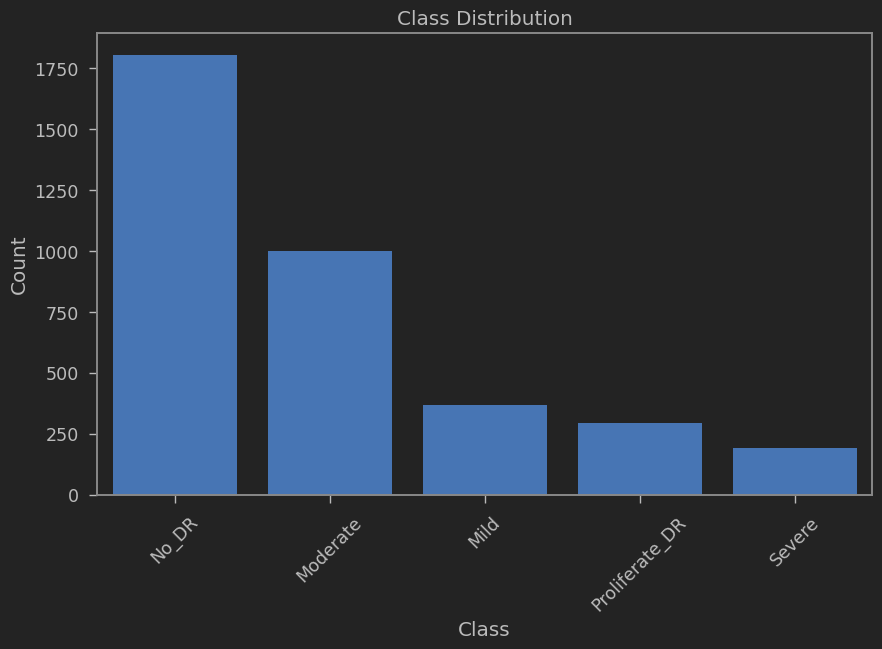

In [ ]:
# Converting the label list into a DataFrame
df = pd.DataFrame({'Class': label})

# Plot countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

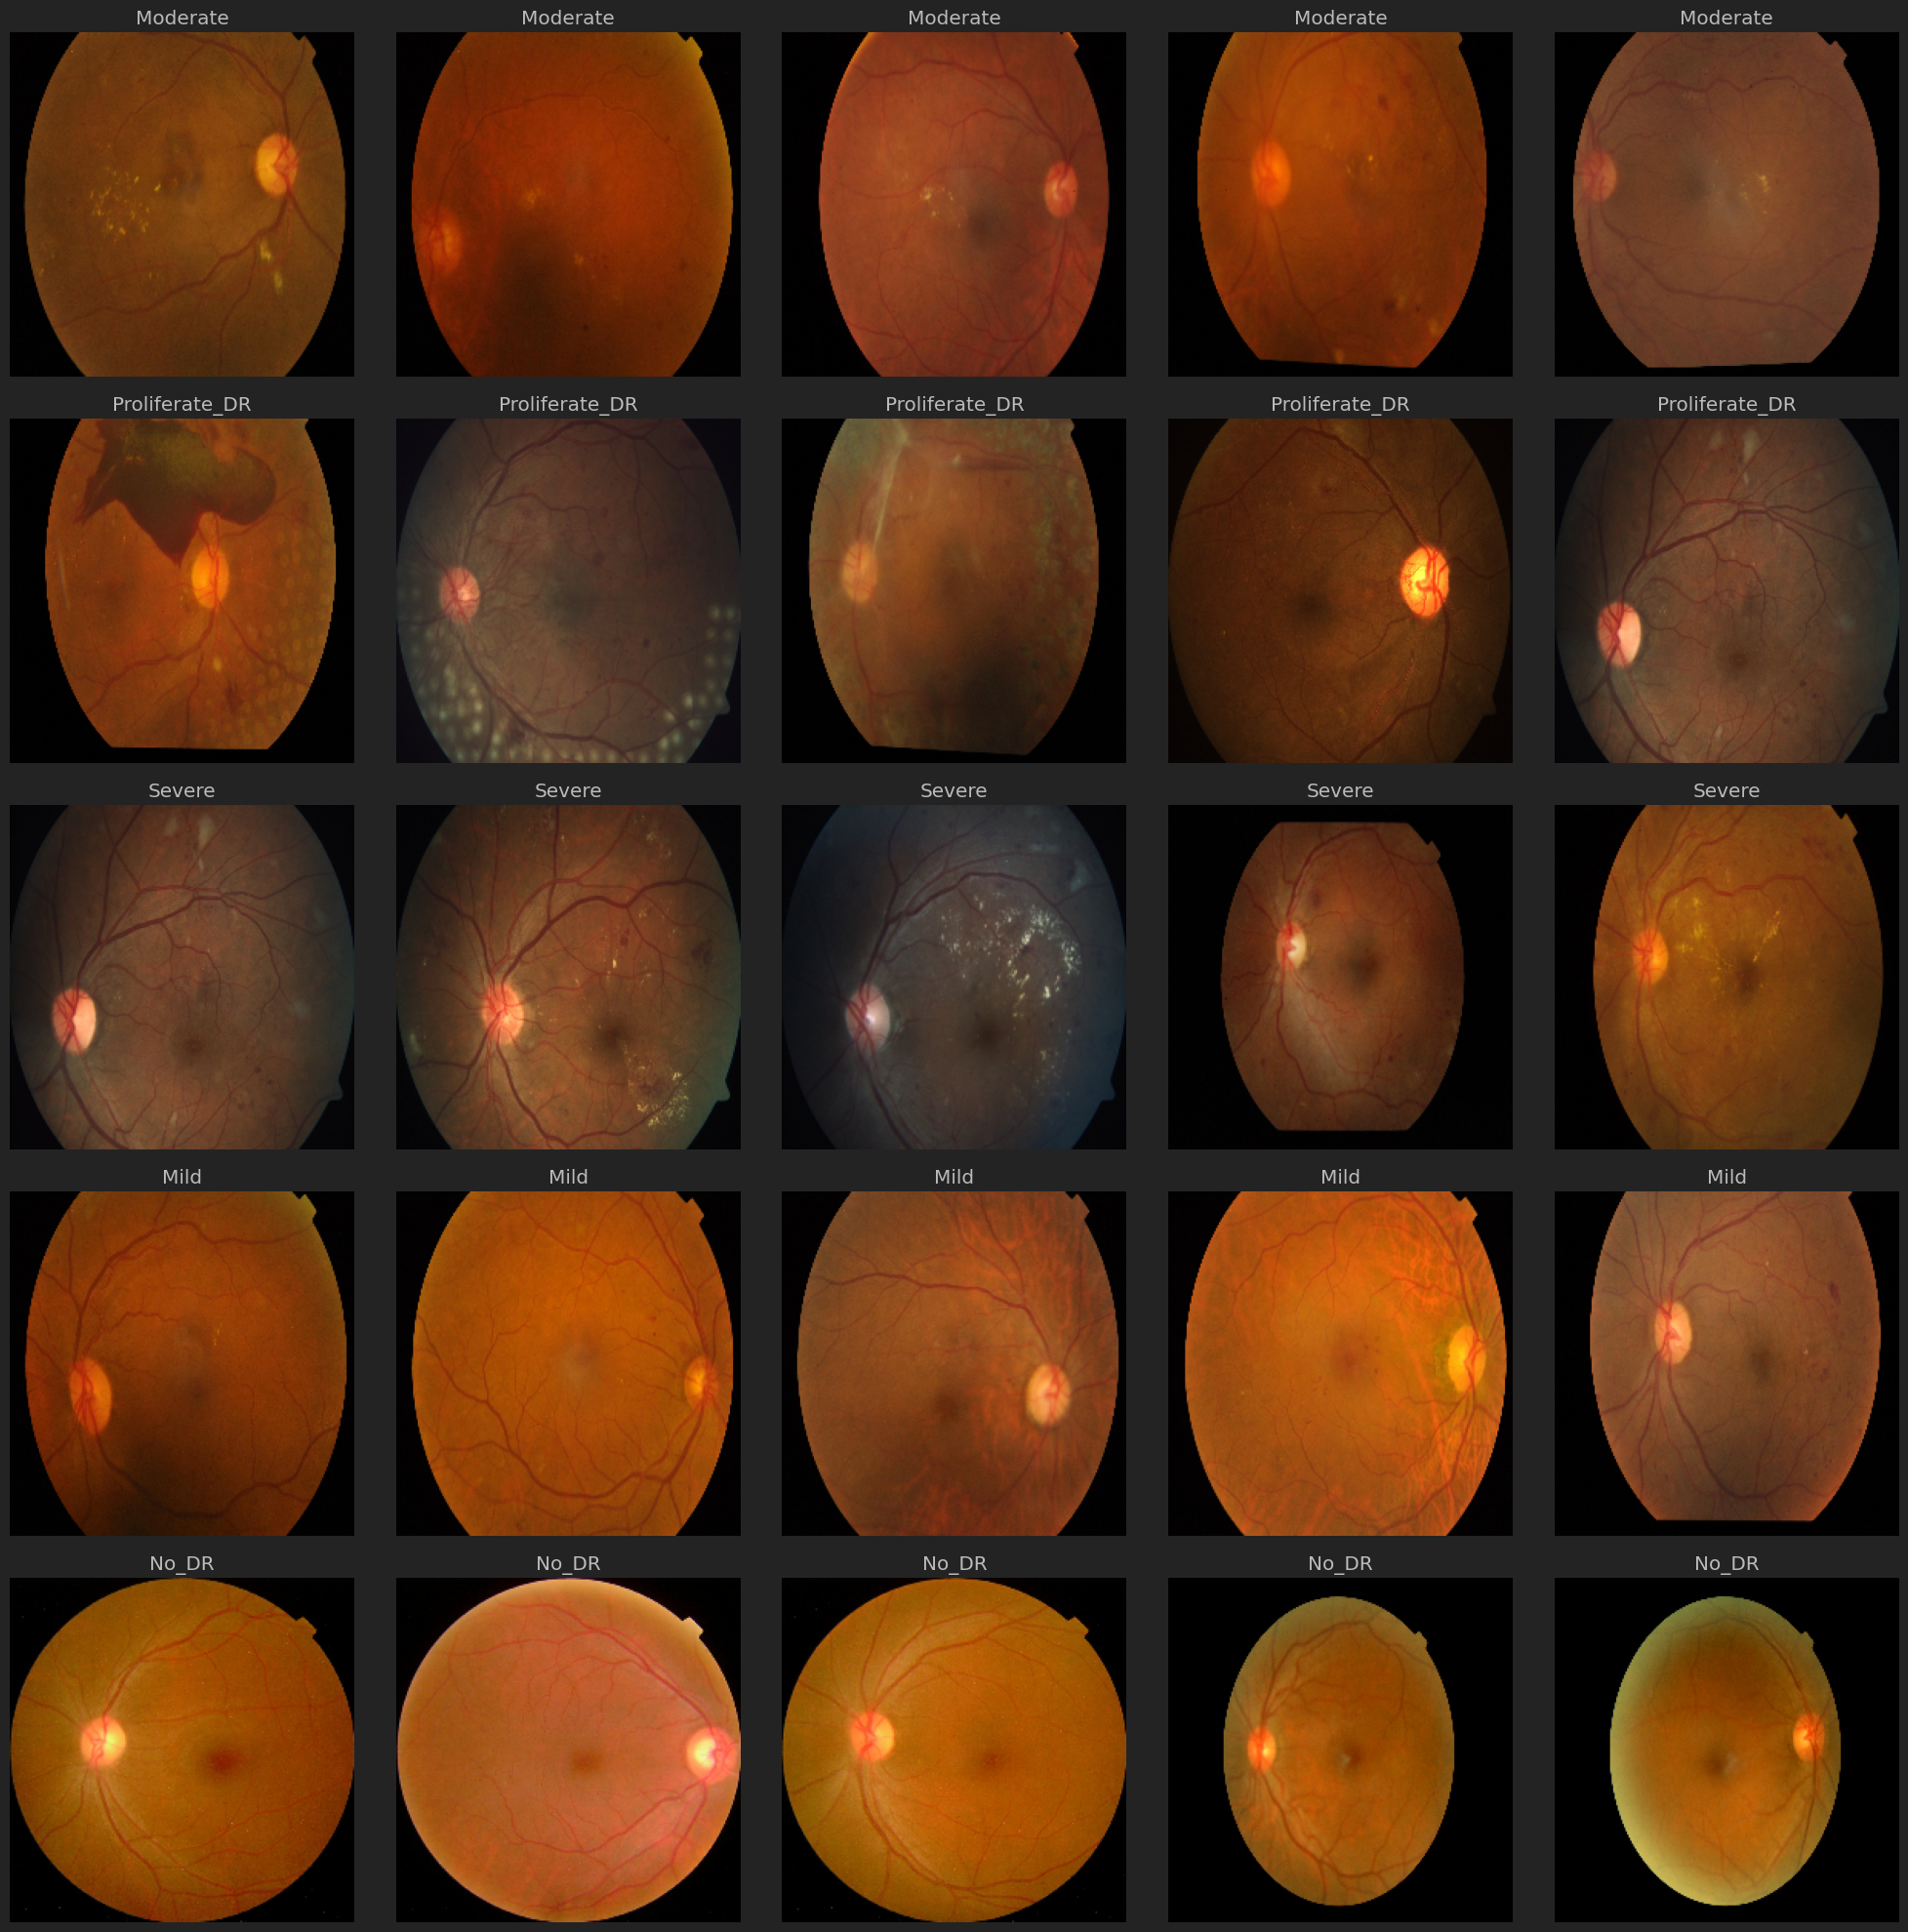

In [ ]:
# Listing the class directories ( 'Mild', 'Moderate', etc.)
class_names = [d for d in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, d))]

# Creating a subplot grid
fig, axs = plt.subplots(len(class_names), 5, figsize=(20, 4 * len(class_names)))

# Iterate over each class directory
for count, class_name in enumerate(class_names):
    class_dir = os.path.join(train_data_dir, class_name)
    # List image files in the current class directory
    image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # Display 5 images for each class
    for j in range(min(5, len(image_files))):  # Ensure not to exceed the number of images available
        img_path = os.path.join(class_dir, image_files[j])
        img = PIL.Image.open(img_path)
        axs[count, j].imshow(img)
        axs[count, j].title.set_text(class_name)
        axs[count, j].axis('off')  # Hide the axis

# Adjusting layout
plt.tight_layout()
plt.show()

In [ ]:
# Lists to hold number of images per class and class names
no_images_per_class = []
class_names = []

# Iterate over each class directory
for class_name in os.listdir(train_data_dir):
    class_dir = os.path.join(train_data_dir, class_name)

    # Check if it is a directory
    if os.path.isdir(class_dir):
        # List image files in the current class directory
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

        # Append the number of images and class name to the lists
        no_images_per_class.append(len(image_files))
        class_names.append(class_name)

        # Print the number of images in the current class
        print(f'Number of images in {class_name} = {len(image_files)}')

#  Print out the lists
print('\nSummary:')
for class_name, num_images in zip(class_names, no_images_per_class):
    print(f'{class_name}: {num_images} images')

Number of images in Moderate = 999
Number of images in Proliferate_DR = 295
Number of images in Severe = 193
Number of images in Mild = 370
Number of images in No_DR = 1805

Summary:
Moderate: 999 images
Proliferate_DR: 295 images
Severe: 193 images
Mild: 370 images
No_DR: 1805 images


In [ ]:
# Creating a DataFrame from the image paths and labels
retina_df = pd.DataFrame({
    'Image': train,
    'Labels': label
})

# Display the DataFrame
retina_df.head()  # Use .head() to preview the first few rows of the DataFrame

Image    Labels
0  /content/drive/My Drive/train/Moderate/04a6fc5...  Moderate
1  /content/drive/My Drive/train/Moderate/094858f...  Moderate
2  /content/drive/My Drive/train/Moderate/07d8db7...  Moderate
3  /content/drive/My Drive/train/Moderate/01c7808...  Moderate
4  /content/drive/My Drive/train/Moderate/064af65...  Moderate

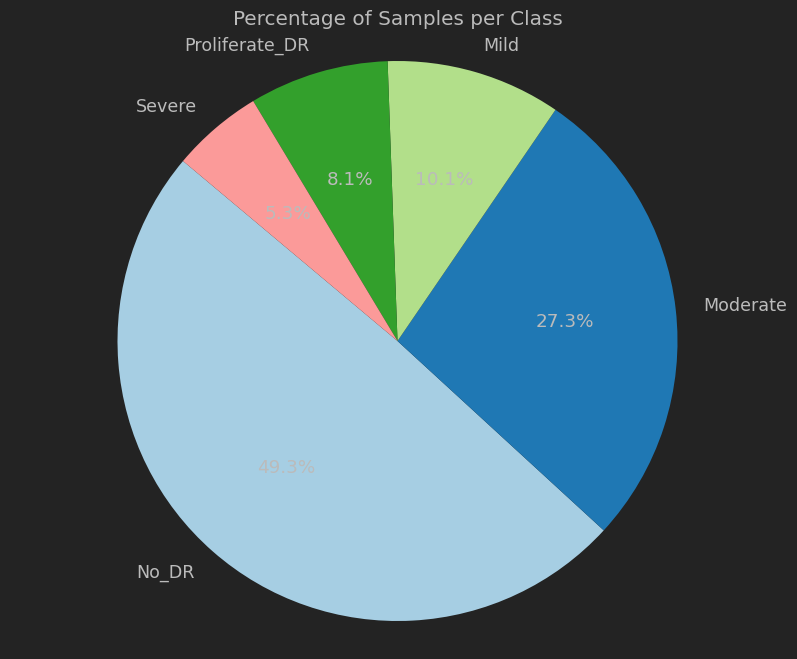

In [ ]:
# Counting the number of samples per class
class_counts = pd.Series(label).value_counts()

# Ploting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(class_counts))))
plt.title('Percentage of Samples per Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Shuffling the data and split it into training and testing
retina_df = shuffle(retina_df)
train_df, test_df = train_test_split(retina_df, test_size=0.2, random_state=42)

# Creating run-time augmentation on training and validation dataset
# For training data generator, I add normalization, shear angle, zooming range, and horizontal flip
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15  # 15% of training data will be used for validation
)
# For test data generator, I only normalize the data
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Creating data generators for training, validation, and test datasets

# Training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/train',  # Update this path to the directory where images are stored
    x_col='Image',
    y_col='Labels',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training'  # Used for training
)

# Validation data generator
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/train',  # Updated this path to the directory where images are stored
    x_col='Image',
    y_col='Labels',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='validation'  # Use for validation
)

# Test data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/train',  # Updated this path to the directory where images are stored
    x_col='Image',
    y_col='Labels',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [ ]:
# Shuffling the data and split it into training and testing
retina_df = shuffle(retina_df)
train_df, test_df = train_test_split(retina_df, test_size=0.2, random_state=42)

# Created run-time augmentation on training and validation dataset
# Adding rotation and brightness adjustment
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,  # Shear angle
    zoom_range=0.2,  # Zooming range
    horizontal_flip=True,  # Horizontal flip
    rotation_range=30,  # Rotate images by a random degree within 30 degrees
    brightness_range=[0.8, 1.2],  # Random brightness adjustment within the range
    validation_split=0.15  # 15% of training data will be used for validation
)

# For test data generator, we only normalize the data
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating data generators for training, validation, and test datasets

# Training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/train',  # Updated this path to the directory where images are stored
    x_col='Image',
    y_col='Labels',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training'  # Use for training
)

# Validation data generator
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/train',  # Update this path to the directory where images are stored
    x_col='Image',
    y_col='Labels',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='validation'  # Use for validation
)

# Test data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/train',  # Updated this path to the directory where images are stored
    x_col='Image',
    y_col='Labels',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [ ]:
def res_block(X, filters, stage):
    """
    Implements a Residual Block for a ResNet model.

    Parameters:
    X -- Input tensor
    filters -- List of integers, the number of filters for each Conv2D layer [f1, f2, f3]
    stage -- Integer, stage number for layer naming

    Returns:
    X -- Output tensor after applying the residual block
    """
    f1, f2, f3 = filters

    # Convolutional Block
    X_copy = X

    # Main Path
    X = Conv2D(f1, (1, 1), strides=(1, 1), name=f'res_{stage}_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPool2D((2, 2))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, (3, 3), strides=(1, 1), padding='same', name=f'res_{stage}_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, (1, 1), strides=(1, 1), name=f'res_{stage}_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_c')(X)

    # Short Path
    X_copy = Conv2D(f3, (1, 1), strides=(1, 1), name=f'res_{stage}_conv_copy', kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPool2D((2, 2))(X_copy)
    X_copy = BatchNormalization(axis=3, name=f'bn_{stage}_conv_copy')(X_copy)

    # Addition of Short and Main Path
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X

    X = Conv2D(f1, (1, 1), strides=(1, 1), name=f'res_{stage}_identity_1_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_1_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, (3, 3), strides=(1, 1), padding='same', name=f'res_{stage}_identity_1_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_1_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, (1, 1), strides=(1, 1), name=f'res_{stage}_identity_1_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_1_c')(X)

    # Addition of Short and Main Path
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X

    X = Conv2D(f1, (1, 1), strides=(1, 1), name=f'res_{stage}_identity_2_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_2_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, (3, 3), strides=(1, 1), padding='same', name=f'res_{stage}_identity_2_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_2_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, (1, 1), strides=(1, 1), name=f'res_{stage}_identity_2_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_2_c')(X)

    # Addition of Short and Main Path
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X

In [ ]:
# Define the input shape
input_shape = (256, 256, 3)

# Input tensor
X_input = Input(shape=input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# Stage 1: Initial Convolutional Layer
X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

# Stage 2: Residual Block
X = res_block(X, filters=[64, 64, 256], stage=2)

# Stage 3: Residual Block
X = res_block(X, filters=[128, 128, 512], stage=3)

# Stage 4: Residual Block
X = res_block(X, filters=[256, 256, 1024], stage=4)

# Stage 5: Residual Block (Optional)
# X = res_block(X, filters=[512, 512, 2048], stage=5)

# Average Pooling
X = AveragePooling2D((2, 2), name='Average_Pooling')(X)

# Final Dense Layer
X = Flatten()(X)
X = Dense(5, activation='softmax', name='Dense_final', kernel_initializer=glorot_uniform(seed=0))(X)

# Define the model
model = Model(inputs=X_input, outputs=X, name='ResNet18')

# Display the model summary
model.summary()

Model: "ResNet18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 128, 128, 64)   │          9,472 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_conv1                  │ (None, 128, 128, 64)   │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 64)   │              0 │ bn_conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 63, 63, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res_2_conv_a (Conv2D)     │ (None, 63, 63, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 31, 31, 64)     │              0 │ res_2_conv_a[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_2_conv_a               │ (None, 31, 31, 64)     │            256 │ max_pooling2d_1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 31, 31, 64)     │              0 │ bn_2_conv_a[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res_2_conv_b (Conv2D)     │ (None, 31, 31, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_2_conv_b               │ (None, 31, 31, 64)     │            256 │ res_2_conv_b[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 31, 31, 64)     │              0 │ bn_2_conv_b[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res_2_conv_copy (Conv2D)  │ (None, 63, 63, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res_2_conv_c (Conv2D)     │ (None, 31, 31, 256)    │         16,640 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 31, 31, 256)    │              0 │ res_2_conv_copy[0][0]  │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 4,987,525 (19.03 MB)

 Trainable params: 4,967,685 (18.95 MB)

 Non-trainable params: 19,840 (77.50 KB)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Defined EarlyStopping to halt training if validation loss doesn't improve
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=15)

# Defined ModelCheckpoint to save the best model based on validation loss
checkpointer = ModelCheckpoint(filepath='weights.keras',
                               verbose=1,
                               save_best_only=True)


In [ ]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // 32,
    callbacks=[checkpointer, earlystopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4961 - loss: 3.4144
Epoch 1: val_loss improved from inf to 1.64802, saving model to weights.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 733s 9s/step - accuracy: 0.4970 - loss: 3.3996 - val_accuracy: 0.2596 - val_loss: 1.6480
Epoch 2/50
 1/77 ━━━━━━━━━━━━━━━━━━━━ 11:15 9s/step - accuracy: 0.7188 - loss: 0.9668

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 1.64802
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7188 - loss: 0.9668 - val_accuracy: 0.2609 - val_loss: 1.7053
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6413 - loss: 0.9651
Epoch 3: val_loss did not improve from 1.64802
77/77 ━━━━━━━━━━━━━━━━━━━━ 723s 9s/step - accuracy: 0.6416 - loss: 0.9649 - val_accuracy: 0.2236 - val_loss: 1.7808
Epoch 4/50
 1/77 ━━━━━━━━━━━━━━━━━━━━ 11:42 9s/step - accuracy: 0.6562 - loss: 0.8850
Epoch 4: val_loss did not improve from 1.64802
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6562 - loss: 0.8850 - val_accuracy: 0.0870 - val_loss: 1.9118
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6753 - loss: 0.8711
Epoch 5: val_loss did not improve from 1.64802
77/77 ━━━━━━━━━━━━━━━━━━━━ 726s 9s/step - accuracy: 0.6752 - loss: 0.8715 - val_accuracy: 0.2596 - val_loss: 1.9483
Epoch 6/50
 1/77 ━━━━━━━━━━━━━━━━━━━━ 8:53 7s/step - accuracy: 0.7500 - loss: 0.8868
Epoch 6:

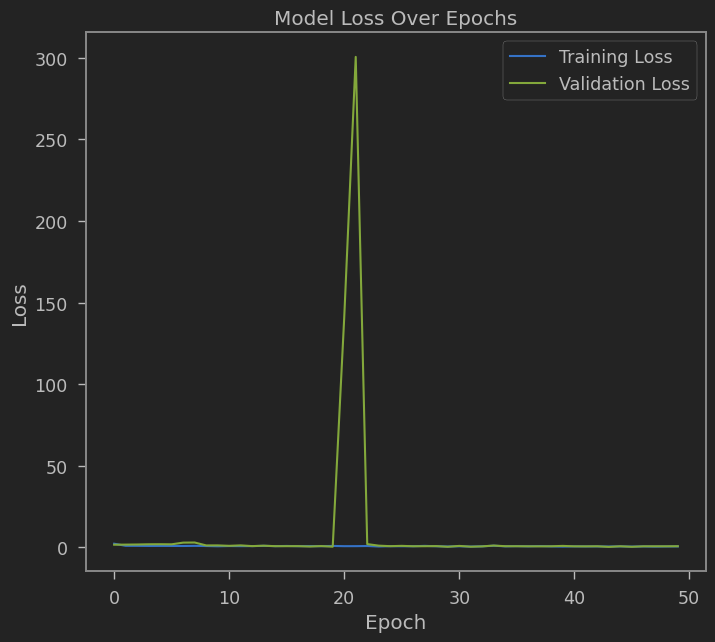

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate the performance of the model on the test set
evaluate = model.evaluate(test_generator, steps=test_generator.n // 32, verbose=1)

# Print the test accuracy
print(f'Test Accuracy: {evaluate[1]:.4f}')


22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7669 - loss: 0.6198
Test Accuracy: 0.7528


In [ ]:
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_pred: {len(y_pred)}")


Length of y_true: 733
Length of y_pred: 704


# TESTING METRICS

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

# Initialized lists to collect predictions and true labels
y_true = []
y_pred = []
y_pred_prob = []

# Collected predictions from the test generator
for i in range(len(test_generator)):
    batch_x, batch_y = next(test_generator)
    batch_pred = model.predict(batch_x)

    y_true.extend(np.argmax(batch_y, axis=-1))
    y_pred.extend(np.argmax(batch_pred, axis=-1))
    y_pred_prob.extend(batch_pred)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)

# Calculate metrics if lengths match
if len(y_true) == len(y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr', average='weighted')
    accuracy = accuracy_score(y_true, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
else:
    print("Lengths of y_true and y_pred do not match.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision: 0.7036
Recall: 0.7517
AUC: 0.9323
Accuracy: 0.7517


# Training metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score
import numpy as np

# Collect all predictions and true labels from the training set
train_true = []
train_pred = []
train_pred_prob = []

# Iterated through the training data generator
for batch_x, batch_y in train_generator:
    batch_pred = model.predict(batch_x)

    train_true.extend(np.argmax(batch_y, axis=-1))
    train_pred.extend(np.argmax(batch_pred, axis=-1))
    train_pred_prob.extend(batch_pred)

    # Checking if we've processed all data
    if len(train_true) >= train_generator.n:
        break

train_true = np.array(train_true)
train_pred = np.array(train_pred)
train_pred_prob = np.array(train_pred_prob)

# Ensured lengths match before calculating metrics
if len(train_true) == len(train_pred):
    precision_train = precision_score(train_true, train_pred, average='weighted')
    recall_train = recall_score(train_true, train_pred, average='weighted')
    auc_train = roc_auc_score(train_true, train_pred_prob, multi_class='ovr', average='weighted')
    accuracy_train = accuracy_score(train_true, train_pred)

    print(f"Training Precision: {precision_train:.4f}")
    print(f"Training Recall: {recall_train:.4f}")
    print(f"Training AUC: {auc_train:.4f}")
    print(f"Training Accuracy: {accuracy_train:.4f}")
else:
    print("Lengths of train_true and train_pred do not match.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

#Confusion Metrics

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

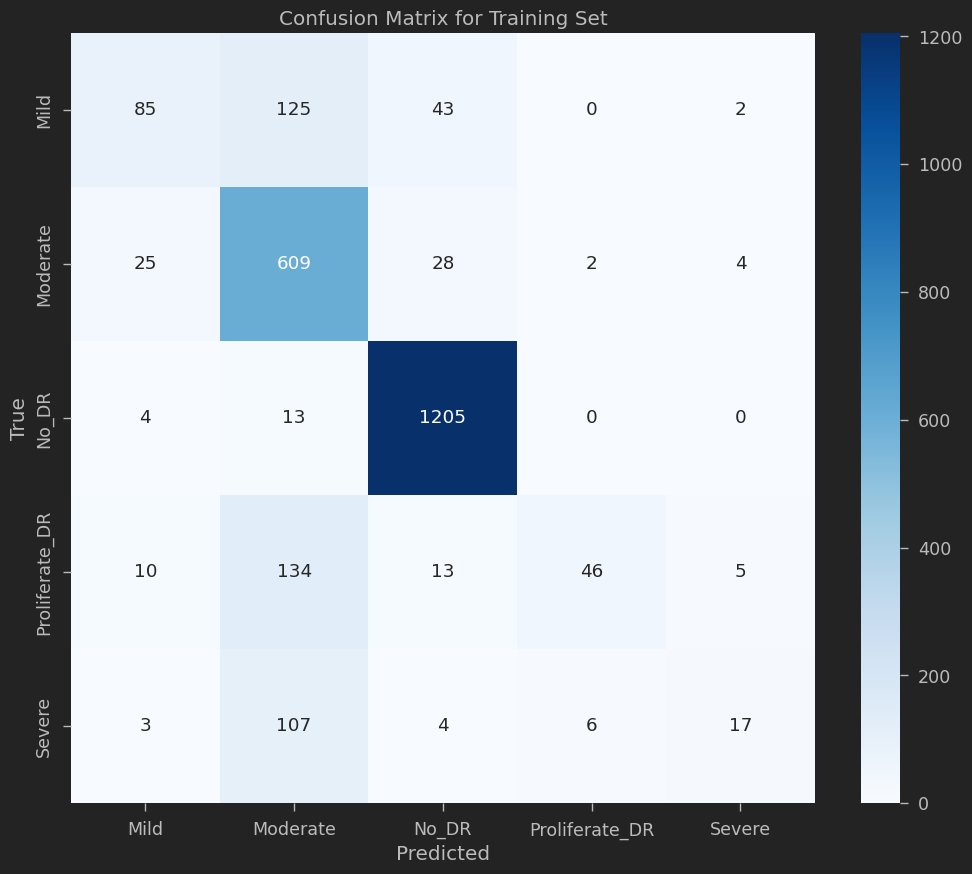

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Collect all predictions and true labels from the training set
train_true = []
train_pred = []

# Iterate through the training data generator
for batch_x, batch_y in train_generator:
    batch_pred = model.predict(batch_x)

    train_true.extend(np.argmax(batch_y, axis=-1))
    train_pred.extend(np.argmax(batch_pred, axis=-1))

    # Check if we've processed all data
    if len(train_true) >= train_generator.n:
        break

train_true = np.array(train_true)
train_pred = np.array(train_pred)

# Compute the confusion matrix
cm = confusion_matrix(train_true, train_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
ax = plt.gca()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix for Training Set')
plt.show()


#sensitivity of each classes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming train_true and train_pred are your true labels and predictions respectively
class_labels = list(train_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(train_true, train_pred)

# Calculate specificity for each class
specificity = []
for i in range(len(class_labels)):
    # True Positives, False Positives, False Negatives, and True Negatives
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - (FP + FN + TP)

    # Calculate specificity
    spec = TN / (TN + FP)
    specificity.append(spec)

# Generate the classification report
report = classification_report(train_true, train_pred, target_names=class_labels)
print("Classification Report:\n")
print(report)

# Append specificity to the report
print("\nSpecificity for each class:\n")
for label, spec in zip(class_labels, specificity):
    print(f"{label}: {spec:.4f}")


Classification Report:

                precision    recall  f1-score   support

          Mild       0.67      0.33      0.45       255
      Moderate       0.62      0.91      0.74       668
         No_DR       0.93      0.99      0.96      1222
Proliferate_DR       0.85      0.22      0.35       208
        Severe       0.61      0.12      0.21       137

      accuracy                           0.79      2490
     macro avg       0.74      0.52      0.54      2490
  weighted avg       0.80      0.79      0.75      2490


Specificity for each class:

Mild: 0.9812
Moderate: 0.7920
No_DR: 0.9306
Proliferate_DR: 0.9965
Severe: 0.9953


# overall sensitivity for the classes

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming train_true and train_pred are your true labels and predictions respectively
class_labels = list(train_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(train_true, train_pred)

# Calculate specificity for each class
specificity = []
class_support = np.sum(conf_matrix, axis=1)  # Number of instances per class (support)

for i in range(len(class_labels)):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - (FP + FN + TP)

    # Let's Calculate specificity
    spec = TN / (TN + FP)
    specificity.append(spec)

# Calculate overall specificity as a weighted average
overall_specificity = np.sum(specificity * (class_support / np.sum(class_support)))

print(f"Overall Specificity: {overall_specificity:.4f}")


Overall Specificity: 0.9077


# Overall senstivity (Recall)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# So, Assuming train_true and train_pred are your true labels and predictions respectively
class_labels = list(train_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(train_true, train_pred)

# Calculate sensitivity (recall) for each class
sensitivity = []
class_support = np.sum(conf_matrix, axis=1)  # Number of instances per class (support)

for i in range(len(class_labels)):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - (FP + FN + TP)

    # Calculate sensitivity (recall)
    sens = TP / (TP + FN)
    sensitivity.append(sens)

# Calculate overall sensitivity as a weighted average
overall_sensitivity = np.sum(sensitivity * (class_support / np.sum(class_support)))

print(f"Overall Sensitivity: {overall_sensitivity:.4f}")


Overall Sensitivity: 0.7880


In [ ]:
# Save the model as HDF5
model.save('Diabetic_model.keras')


In [ ]:
import tensorflow as tf

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpjw2tprmd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139944131862672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944131502048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944130931952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944130926672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944130928608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944130922272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944131308080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944131312480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944131310192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139944131308256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13994413131142

In [ ]:
import pickle

# Save the model using Pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
